<a href="https://colab.research.google.com/github/linesn/xmen/blob/main/covariance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# load the data
characters = pd.read_csv('characters.csv')
cv = pd.read_csv('character_visualization.csv')
cb = pd.read_csv('comic_bechdel.csv')
covers = pd.read_csv('covers.csv')
ic = pd.read_csv('issue_collaborators.csv')
locations = pd.read_csv('locations.csv')
xmen_bechdel = pd.read_csv('xmen_bechdel.csv')

In [ ]:
characters.head()

,issue,character,rendered_unconcious,captured,declared_dead,redressed,depowered,clothing_torn,subject_to_torture,quits_team,surrenders,number_of_kills_humans,number_of_kills_non_humans,initiates_physical_conflict,expresses_reluctance_to_fight,on_a_date_with_which_character,kiss_with_which_character,hand_holding_with_which_character,dancing_with_which_character,flying_with_another_character,arm_in_arm_with_which_character,hugging_with_which_character,physical_contact_other,carrying_with_which_character,shared_bed_with_which_character,shared_room_domestically_with_which_character,explicitly_states_i_love_you_to_whom,shared_undress,shower_number_of_panels_shower_lasts,bath_number_of_panels_bath_lasts,depicted_eating_food,visible_tears_number_of_panels,visible_tears_number_of_intances,special_notes
0,97,Professor X,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Moira MacTaggert,NaN,NaN,NaN,NaN,Moira MacTaggert,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN
1,97,Wolverine = Logan,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Storm,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
2,97,Cyclops = Scott Summers,0,0,0,0,0,0,0,0,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
3,97,Marvel Girl/Phoenix = Jean Grey,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Storm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
4,97,Storm = Ororo Munroe,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jean Grey,NaN,NaN,Wolverine,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN


In [ ]:
# create x and Y matrices to store the data
x = characters[['rendered_unconcious']].to_numpy()
y = characters[['captured']].to_numpy()

In [ ]:
# convert the target variable (X-Man character names) to integer representations
character_name = characters['character'].unique()
character_name_dict = dict(zip(set(character_name), range(len(character_name))))
characters['character'] = characters['character'].apply(lambda x: character_name_dict[x])

In [ ]:
# take a subset of the features
my_cols = ['character', 'rendered_unconcious', 'captured',
       'declared_dead', 'redressed', 'depowered', 'clothing_torn',
       'subject_to_torture', 'quits_team', 'surrenders',
       'number_of_kills_humans', 'number_of_kills_non_humans','shower_number_of_panels_shower_lasts',
       'bath_number_of_panels_bath_lasts', 'depicted_eating_food',
       'visible_tears_number_of_panels',
       'visible_tears_number_of_intances']

In [ ]:
# subset the dataframe on the columns we selected
characters_subset = characters[my_cols]

In [ ]:
# store the correlation matrix
corrMatrix = characters_subset.corr()

In [ ]:
# display the correlation matrix
corrMatrix

,character,rendered_unconcious,captured,declared_dead,redressed,depowered,clothing_torn,subject_to_torture,quits_team,surrenders,number_of_kills_humans,number_of_kills_non_humans,shower_number_of_panels_shower_lasts,bath_number_of_panels_bath_lasts,depicted_eating_food,visible_tears_number_of_panels,visible_tears_number_of_intances
character,1.000000,0.035390,0.022879,0.020025,-0.001925,-0.006708,0.047094,-0.021037,0.021473,0.021366,0.034876,-0.025564,0.008938,0.010548,0.022730,-0.000778,-0.001915
rendered_unconcious,0.035390,1.000000,0.176698,0.088992,0.102420,0.261729,0.161968,0.064613,-0.006471,0.037977,0.011594,-0.003735,-0.010175,0.059522,0.138968,0.119906,0.116540
captured,0.022879,0.176698,1.000000,0.101702,0.202301,0.285999,0.154630,0.119586,-0.004919,0.055503,0.024659,-0.002839,0.005752,0.024315,-0.008351,0.041064,0.054955
declared_dead,0.020025,0.088992,0.101702,1.000000,0.068903,0.073967,0.128351,-0.006223,-0.002779,-0.002269,0.014072,-0.001604,-0.004370,-0.004247,0.020916,0.017035,0.026970
redressed,-0.001925,0.102420,0.202301,0.068903,1.000000,0.156488,0.088535,0.065433,-0.002671,-0.002181,0.149068,-0.001542,-0.004200,0.048138,0.069205,0.007132,0.013282
depowered,-0.006708,0.261729,0.285999,0.073967,0.156488,1.000000,0.089909,0.071451,-0.003820,0.069802,0.035036,-0.002205,-0.006007,-0.005838,0.058596,0.059689,0.058362
clothing_torn,0.047094,0.161968,0.154630,0.128351,0.088535,0.089909,1.000000,0.077473,-0.004258,-0.003476,0.049671,-0.002458,0.033738,0.057115,0.078031,0.100128,0.111770
subject_to_torture,-0.021037,0.064613,0.119586,-0.006223,0.065433,0.071451,0.077473,1.000000,-0.001597,-0.001304,-0.003491,-0.000922,-0.002512,-0.002441,-0.010000,0.045161,0.063875
quits_team,0.021473,-0.006471,-0.004919,-0.002779,-0.002671,-0.003820,-0.004258,-0.001597,1.000000,-0.000582,-0.001559,-0.000412,-0.001122,-0.001090,-0.004466,-0.003031,-0.003204
surrenders,0.021366,0.037977,0.055503,-0.002269,-0.002181,0.069802,-0.003476,-0.001304,-0.000582,1.000000,-0.001273,-0.000336,-0.000916,-0.000890,0.059247,-0.002475,-0.002616


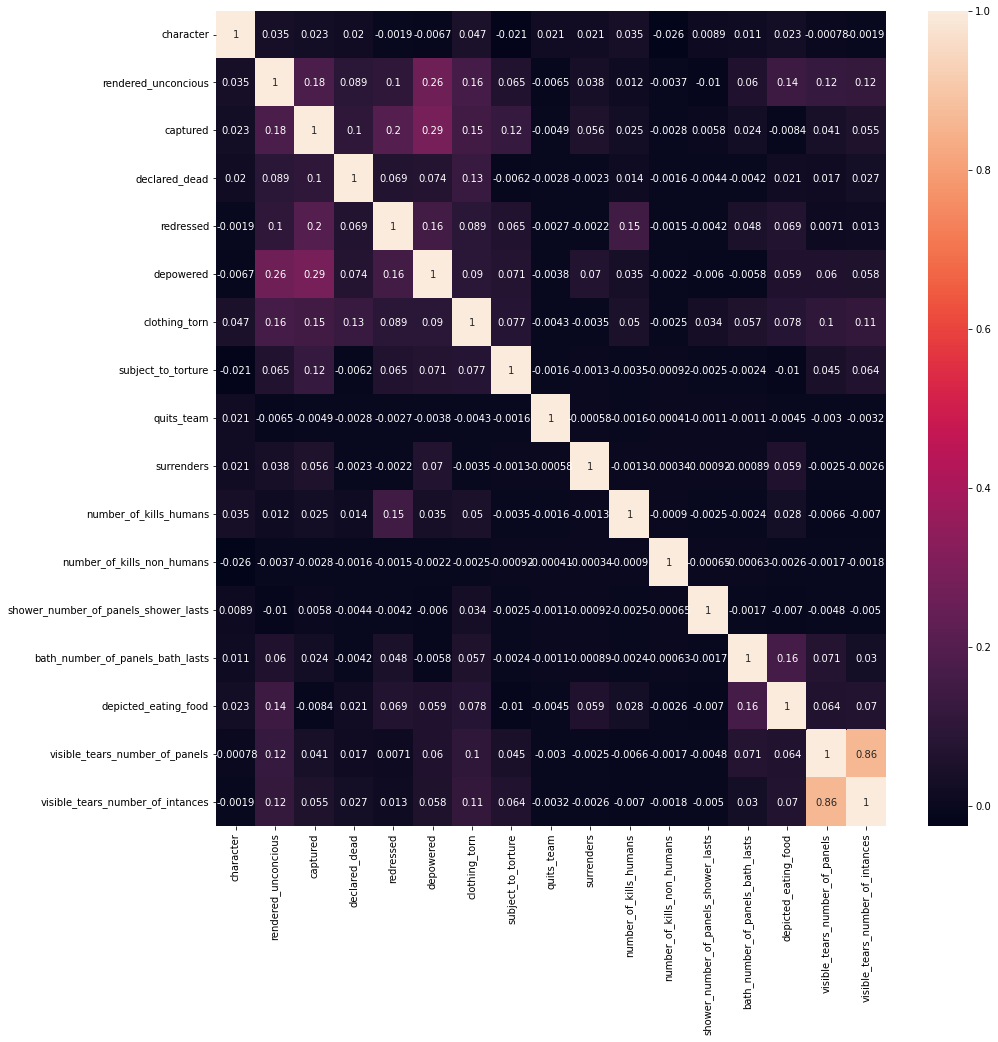

In [ ]:
# view a heatmap of the correlations
fig, ax = plt.subplots(figsize=(15,15))   
sn.heatmap(corrMatrix, annot=True)

In [ ]:
# store teh X and y variables
X = characters[my_cols]
y = characters[['character']]

In [ ]:
# perform 75/25 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X, np.ravel(y))
clf.score(X_test, y_test)

0.9601139601139601

In [ ]:
# perform 10 fold cross validation
scores = cross_val_score(clf, X, np.ravel(y), cv=10)

In [ ]:
# view the scores for the 10 folds
scores

array([0.93824228, 0.90498812, 0.92874109, 0.91686461, 0.94061758,
       0.82185273, 0.85510689, 0.86935867, 0.87173397, 0.85714286])

In [ ]:
# view the average scores for the 10 folds
np.average(scores)

0.8904648795385139